In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mizdah
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | amparai
City not found. Skipping...
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | novodugino
Processing Record 9 of Set 1 | belaya gora
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | san jose
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | umea
Processing Record 18 of Set 1 | north bend
Processing Record 19 of Set 1 | alta floresta
Processing Record 20 of Set 1 | xingyi
Processing Record 21 of Set 1 | huilong
Processing Rec

Processing Record 38 of Set 4 | encruzilhada do sul
Processing Record 39 of Set 4 | athens
Processing Record 40 of Set 4 | necochea
Processing Record 41 of Set 4 | nguiu
City not found. Skipping...
Processing Record 42 of Set 4 | san policarpo
Processing Record 43 of Set 4 | ejido
Processing Record 44 of Set 4 | gurskoye
City not found. Skipping...
Processing Record 45 of Set 4 | warren
Processing Record 46 of Set 4 | mayakonda
Processing Record 47 of Set 4 | samusu
City not found. Skipping...
Processing Record 48 of Set 4 | ous
Processing Record 49 of Set 4 | quzhou
Processing Record 50 of Set 4 | eyl
Processing Record 1 of Set 5 | tiksi
Processing Record 2 of Set 5 | kalmunai
Processing Record 3 of Set 5 | kashi
Processing Record 4 of Set 5 | coquimbo
Processing Record 5 of Set 5 | macaubas
Processing Record 6 of Set 5 | kilindoni
Processing Record 7 of Set 5 | bemidji
Processing Record 8 of Set 5 | lugovoy
Processing Record 9 of Set 5 | berlevag
Processing Record 10 of Set 5 | luoro

Processing Record 22 of Set 8 | lazaro cardenas
Processing Record 23 of Set 8 | esso
Processing Record 24 of Set 8 | bengkulu
Processing Record 25 of Set 8 | cairns
Processing Record 26 of Set 8 | jujuy
City not found. Skipping...
Processing Record 27 of Set 8 | falealupo
City not found. Skipping...
Processing Record 28 of Set 8 | maniitsoq
Processing Record 29 of Set 8 | kazachinskoye
Processing Record 30 of Set 8 | bahia blanca
Processing Record 31 of Set 8 | bubaque
Processing Record 32 of Set 8 | marsa matruh
Processing Record 33 of Set 8 | nishihara
Processing Record 34 of Set 8 | russell
Processing Record 35 of Set 8 | ghauspur
Processing Record 36 of Set 8 | okhotsk
Processing Record 37 of Set 8 | terbuny
Processing Record 38 of Set 8 | boa vista
Processing Record 39 of Set 8 | pangnirtung
Processing Record 40 of Set 8 | popondetta
Processing Record 41 of Set 8 | diffa
Processing Record 42 of Set 8 | grand gaube
Processing Record 43 of Set 8 | zelenogorskiy
Processing Record 44 

Processing Record 12 of Set 12 | barcelos
Processing Record 13 of Set 12 | beihai
Processing Record 14 of Set 12 | kaseda
Processing Record 15 of Set 12 | gigmoto
Processing Record 16 of Set 12 | quatre cocos
Processing Record 17 of Set 12 | pasni
Processing Record 18 of Set 12 | harper
Processing Record 19 of Set 12 | myitkyina
Processing Record 20 of Set 12 | miri
Processing Record 21 of Set 12 | santa maria
Processing Record 22 of Set 12 | kaspiysk
Processing Record 23 of Set 12 | paka
Processing Record 24 of Set 12 | meulaboh
Processing Record 25 of Set 12 | mimongo
Processing Record 26 of Set 12 | majene
Processing Record 27 of Set 12 | surt
Processing Record 28 of Set 12 | nuuk
Processing Record 29 of Set 12 | kamaishi
Processing Record 30 of Set 12 | emborion
Processing Record 31 of Set 12 | kozluk
Processing Record 32 of Set 12 | magdalena
Processing Record 33 of Set 12 | turukhansk
Processing Record 34 of Set 12 | buqayq
City not found. Skipping...
Processing Record 35 of Set 

576

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mizdah,31.4451,12.9801,45.16,65,46,14.70,LY,2022-02-01 22:02:49
1,Ushuaia,-54.8000,-68.3000,41.13,93,99,9.89,AR,2022-02-01 22:00:53
2,Rikitea,-23.1203,-134.9692,78.35,70,93,5.73,PF,2022-02-01 22:00:57
3,Yellowknife,62.4560,-114.3525,-18.71,74,0,8.05,CA,2022-02-01 21:57:58
4,Butaritari,3.0707,172.7902,81.63,76,45,11.14,KI,2022-02-01 22:02:50
5,Mataura,-46.1927,168.8643,73.47,60,100,7.67,NZ,2022-02-01 22:00:51
6,Novodugino,55.6305,34.2842,18.79,93,98,10.98,RU,2022-02-01 22:02:50
7,Belaya Gora,68.5333,146.4167,-15.18,96,100,4.92,RU,2022-02-01 22:02:51
8,Atuona,-9.8000,-139.0333,78.33,73,13,20.33,PF,2022-02-01 22:02:51
9,Georgetown,5.4112,100.3354,82.33,88,20,1.99,MY,2022-02-01 21:59:53


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mizdah,LY,2022-02-01 22:02:49,31.4451,12.9801,45.16,65,46,14.70
1,Ushuaia,AR,2022-02-01 22:00:53,-54.8000,-68.3000,41.13,93,99,9.89
2,Rikitea,PF,2022-02-01 22:00:57,-23.1203,-134.9692,78.35,70,93,5.73
3,Yellowknife,CA,2022-02-01 21:57:58,62.4560,-114.3525,-18.71,74,0,8.05
4,Butaritari,KI,2022-02-01 22:02:50,3.0707,172.7902,81.63,76,45,11.14
5,Mataura,NZ,2022-02-01 22:00:51,-46.1927,168.8643,73.47,60,100,7.67
6,Novodugino,RU,2022-02-01 22:02:50,55.6305,34.2842,18.79,93,98,10.98
7,Belaya Gora,RU,2022-02-01 22:02:51,68.5333,146.4167,-15.18,96,100,4.92
8,Atuona,PF,2022-02-01 22:02:51,-9.8000,-139.0333,78.33,73,13,20.33
9,Georgetown,MY,2022-02-01 21:59:53,5.4112,100.3354,82.33,88,20,1.99


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

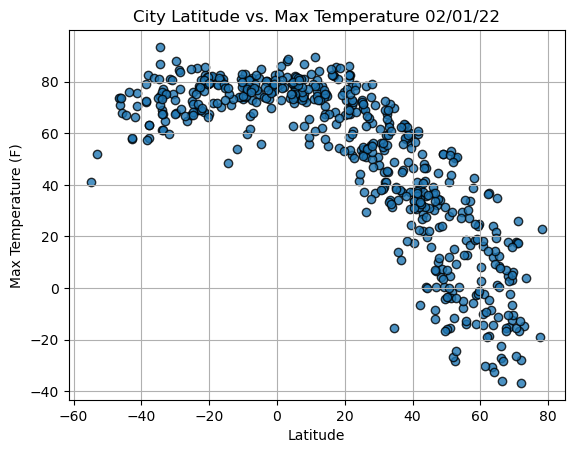

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

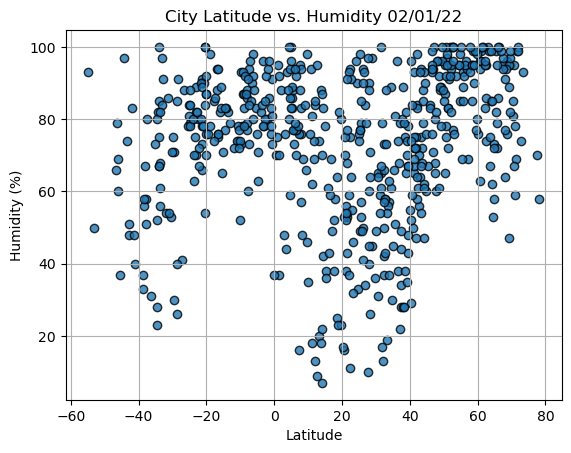

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

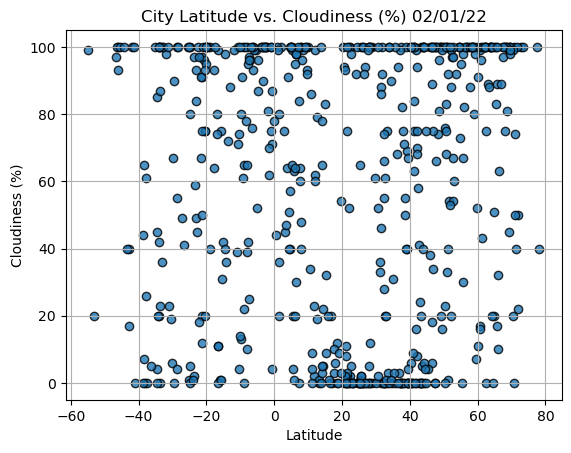

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

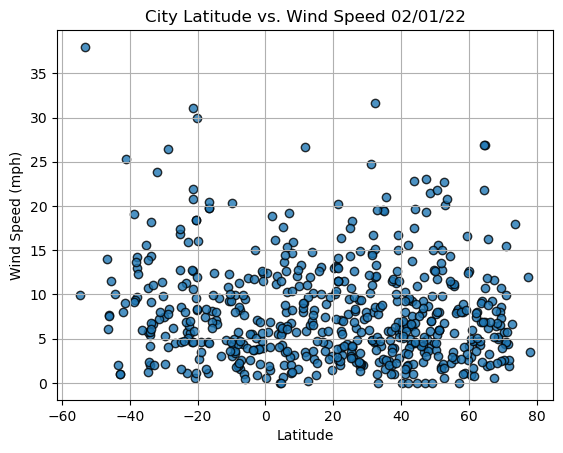

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()